# Week 4 Exercises

Karlie Schwartzwald  
DSC530 Summer 2022  
Bellevue University  

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [2]:
import numpy as np

In [3]:
import nsfg
import thinkstats2
import thinkplot
import pandas as pd

## Exercise 3.1

###### Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

###### Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [5]:
resp = nsfg.ReadFemResp()

Below is a histogram of the data.

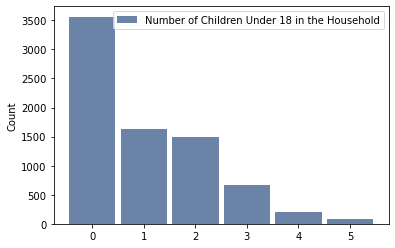

In [6]:
num_child = resp['numkdhh']
hist = thinkstats2.Hist(num_child, label="Number of Children Under 18 in the Household")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="", ylabel="Count")


In [29]:
type(num_child)

pandas.core.series.Series

This is normalized, creating a PMF.

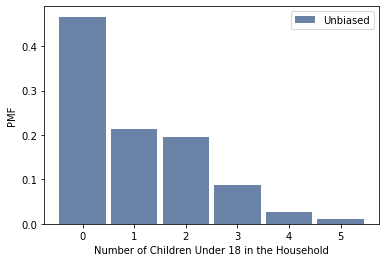

In [7]:
pmf2 = thinkstats2.Pmf(num_child, label="Unbiased")
thinkplot.Hist(pmf2)
thinkplot.Config(xlabel="Number of Children Under 18 in the Household", ylabel="PMF")

In [8]:
# This function creates a biased pmf from a given pmf
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

###### Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

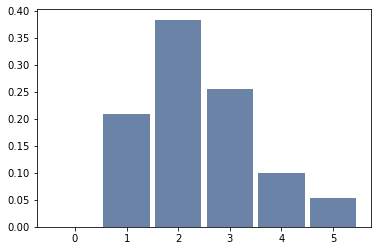

In [9]:
# Run this function to create the biased pmf
biaspmf_child = BiasPmf(pmf2,"Biased")
thinkplot.Hist(biaspmf_child)

###### Plot the actual and biased distributions, and compute their means.

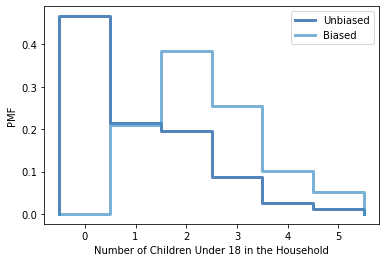

In [10]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf2, biaspmf_child])
thinkplot.Config(xlabel="Number of Children Under 18 in the Household", ylabel="PMF")

In [11]:
print("Actual mean", pmf2.Mean())
print("Observed mean", biaspmf_child.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


## Exercise 3.2

###### Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [12]:
def PmfMean(pmf):
    #Initilize summing variable
    mean = 0
    for x, freq in pmf.Items():
        mean = mean + x * freq
    return mean

def PmfVar(pmf):
    #Initilize summing variable
    s2 = 0
    mn = pmf.Mean()
    for x, freq in pmf.Items():
        s2 = s2 + freq * (x - mn) ** 2
    return s2

In [13]:
mean = PmfMean(pmf2)
var = PmfVar(pmf2)
print(f'The calculated mean is {mean}.')
print(f'The actual mean is {pmf2.Mean()}.')
print(f'The calculated variance is {var}.')
print(f'The actual variance is {pmf2.Var()}.')

The calculated mean is 1.024205155043831.
The actual mean is 1.024205155043831.
The calculated variance is 1.4128643263531195.
The actual variance is 1.4128643263531195.


## Exercise 4.1

###### How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [14]:
#from the textbook:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

My birth weight percentile rank is 80.44381285526892%


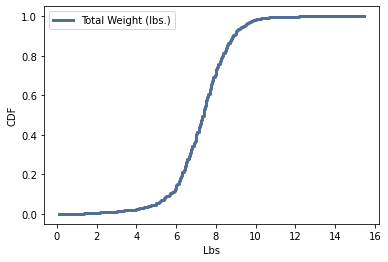

<Figure size 576x432 with 0 Axes>

In [15]:
preg = nsfg.ReadFemPreg()
alive = preg[preg.outcome == 1]
myrank = PercentileRank(alive.totalwgt_lb, 8.375)
print(f'My birth weight percentile rank is {myrank}%')
cdf = thinkstats2.Cdf(alive.totalwgt_lb, label = 'Total Weight (lbs.)')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Lbs', ylabel='CDF')

## Exercise 4.2

###### The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability. Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [30]:
random_array = np.random.random(1000)

pandas.core.series.Series

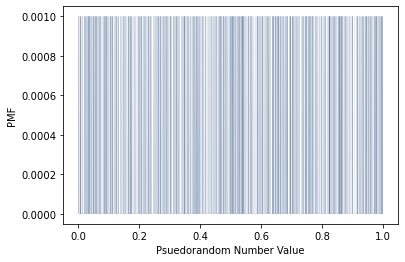

In [34]:
r_pmf = thinkstats2.Pmf(random_array)
thinkplot.Pmf(r_pmf, linewidth=0.07)
thinkplot.Config(xlabel='Psuedorandom Number Value', ylabel='PMF')

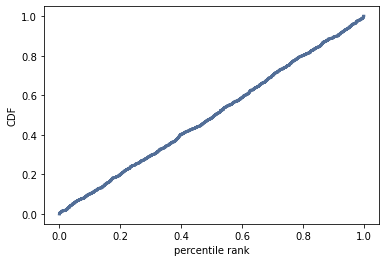

The distribution is not uniform.


<Figure size 576x432 with 0 Axes>

In [36]:
r_cdf = thinkstats2.Cdf(random_array)
thinkplot.Cdf(r_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')
print('The distribution is not uniform.')